<a href="https://colab.research.google.com/github/ClarkCenteno/VISUALIZATIONS_AND_DATA_ANALYSIS/blob/main/Final_Project_%7C_Data_Dashboard_and_Storytelling_Centeno%2CEspinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Final Project | Data Dashboard and Storytelling**





---



Name :
Centeno, Clark Kent B. & Espinas, Charles Vence R.

Course Code and Title : CPE031 | Visualization and Data Analysis

Date Submitted :

Instructor : Mrs. Maria Rizette Sayo

**A Data-Driven Dashboard for Monitoring Earthquake and Tsunami Patterns in the Philippines**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Original dataset shape: (782, 13)
   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  
Filtered dataset (Philippines only): (29, 13)


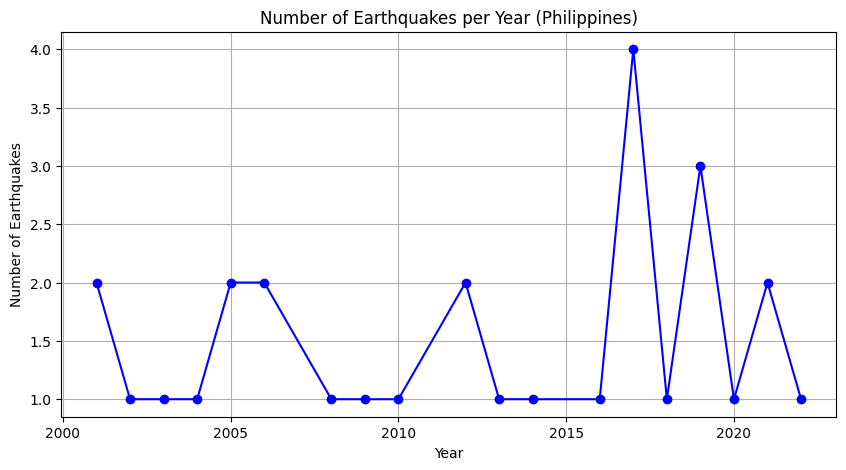

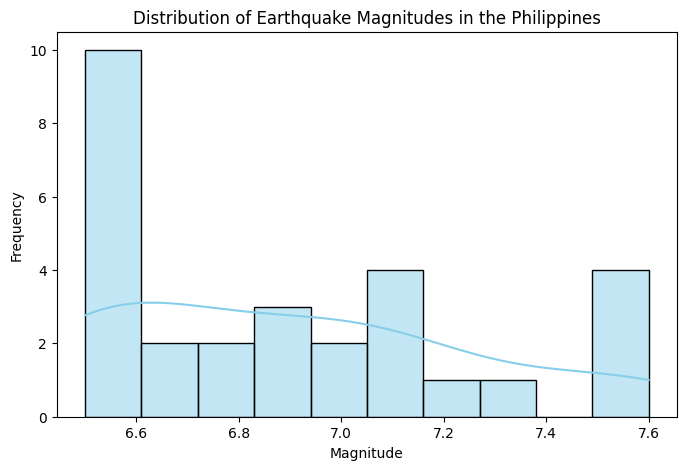

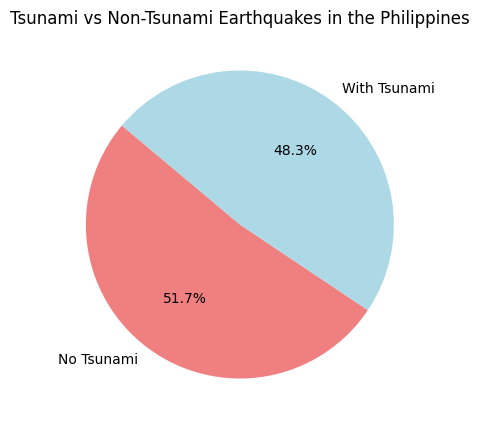

In [ ]:
!pip install pandas matplotlib seaborn plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

EQTSdataset = "/content/drive/MyDrive/CPE 031_CENTENO/earthquake_data_tsunami.csv"

df = pd.read_csv(EQTSdataset)
print("Original dataset shape:", df.shape)
print(df.head())

ph_data = df[(df['latitude'] >= 3.0) & (df['latitude'] <= 22.5) &
             (df['longitude'] >= 114.0) & (df['longitude'] <= 127.5)]



print("Filtered dataset (Philippines only):", ph_data.shape)
ph_data.head()

ph_data = ph_data.dropna(subset=['latitude', 'longitude', 'magnitude'])

fig_map = px.scatter_mapbox(
    ph_data,
    lat="latitude",
    lon="longitude",
    color="magnitude",
    size="magnitude",
    zoom=4.5,
    mapbox_style="carto-positron",
    title="Earthquake Locations in the Philippines"
)
fig_map.show()

yearly = ph_data['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(yearly.index, yearly.values, marker='o', color='blue')
plt.title("Number of Earthquakes per Year (Philippines)")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(ph_data['magnitude'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Earthquake Magnitudes in the Philippines")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

if 'tsunami' in ph_data.columns:
    tsunami_counts = ph_data['tsunami'].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(tsunami_counts, labels=['No Tsunami', 'With Tsunami'], autopct='%1.1f%%', startangle=140, colors=['lightcoral','lightblue'])
    plt.title("Tsunami vs Non-Tsunami Earthquakes in the Philippines")
    plt.show()
else:
    print("No 'tsunami' column found — please check column names using df.columns")
